In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os


import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

#### 1.Прочитайте базу my_BRENT2019.csv и перейдите к представлению ряда первыми разностями.

In [2]:
path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


Text(0.5, 0, 't')

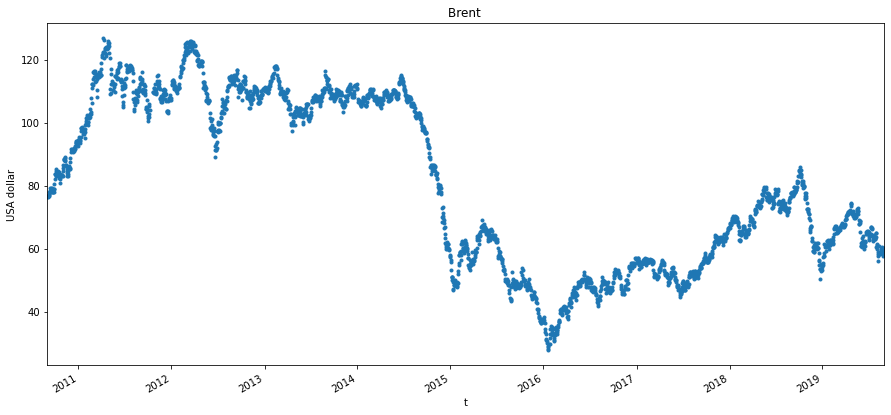

In [3]:
_ = brent_data['Значение'].plot( style='.', figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [4]:
brent_data['brent_diff'] = brent_data['Значение'].diff().fillna(0)
brent_data.tail()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,brent_diff
Дата,,,,,,,,,,,,
2019-08-27,59.59,2019,8,27,3,239,35,1,0,0,0,1.33
2019-08-28,59.84,2019,8,28,3,240,35,2,0,0,0,0.25
2019-08-29,60.37,2019,8,29,3,241,35,3,0,0,0,0.53
2019-08-30,59.19,2019,8,30,3,242,35,4,0,0,0,-1.18
2019-09-01,58.84,2019,9,1,3,244,35,6,0,1,0,-0.35


Text(0.5, 0, 't')

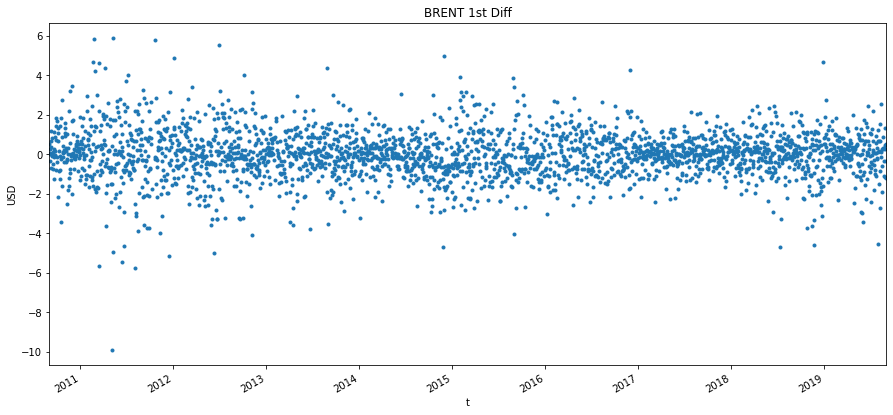

In [5]:
_ = brent_data.iloc[1:, -1].plot(style='.', figsize=(15, 7), title='BRENT 1st Diff')
plt.ylabel('USD')
plt.xlabel('t')

#### 2. Добавьте первые разности по стоимости доллара и евро к рублю.

In [6]:
usd_df = pd.read_excel('RC_F01_09_2010_T01_09_2019.xlsx', sep = ',', usecols=[1, 2], index_col=[0], parse_dates=[0])
usd_df.rename(columns={'curs': 'USD'}, inplace=True)
usd_df.head()

,USD
data,
2010-09-01,30.8669
2010-09-02,30.8001
2010-09-03,30.6858
2010-09-04,30.6922
2010-09-07,30.5771


Text(0.5, 0, 't')

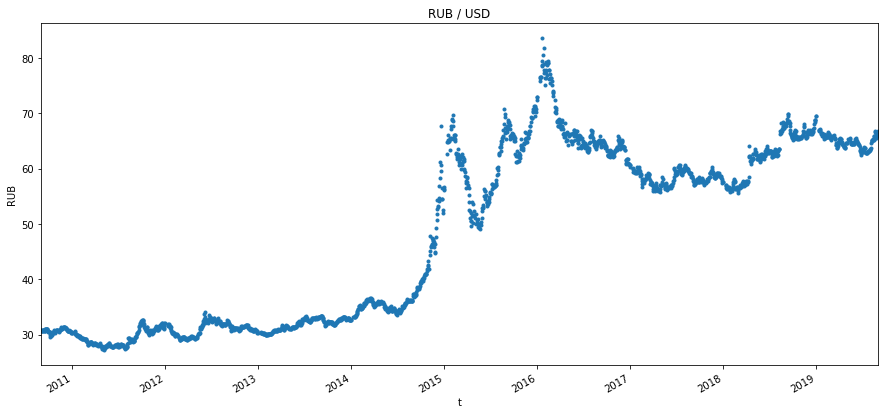

In [7]:
_ = usd_df['USD'].plot(style='.', figsize=(15, 7), title='RUB / USD')
plt.ylabel('RUB')
plt.xlabel('t')

In [8]:
usd_df['USD_diff'] = usd_df['USD'].diff().fillna(0)
usd_df.head(2)

,USD,USD_diff
data,,
2010-09-01,30.8669,0.0000
2010-09-02,30.8001,-0.0668


Text(0.5, 0, 't')

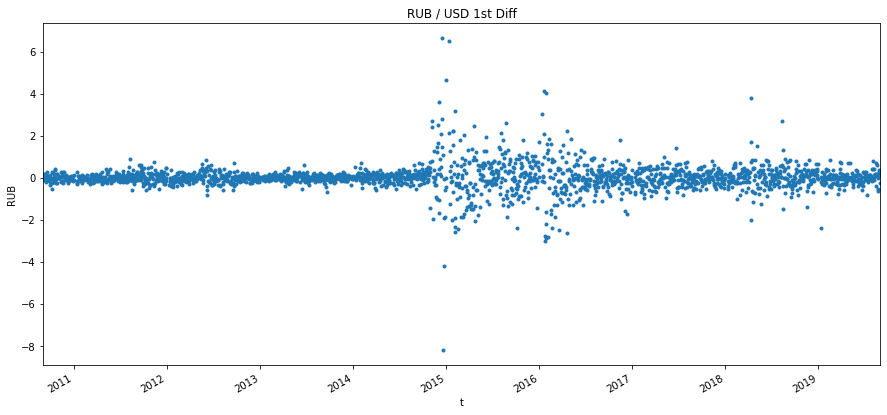

In [9]:
_ = usd_df.iloc[1:, -1].plot(style='.', figsize=(15, 7), title='RUB / USD 1st Diff')
plt.ylabel('RUB')
plt.xlabel('t')

In [10]:
eur_df = pd.read_excel('RC_F01_09_2010_T01_09_2019_eur.xlsx', sep = ',', usecols=[1, 2], index_col=[0], parse_dates=[0])
eur_df.rename(columns={'curs': 'EUR'}, inplace=True)
eur_df.head()

,EUR
data,
2010-09-01,39.0127
2010-09-02,39.1654
2010-09-03,39.2901
2010-09-04,39.3505
2010-09-07,39.4720


Text(0.5, 0, 't')

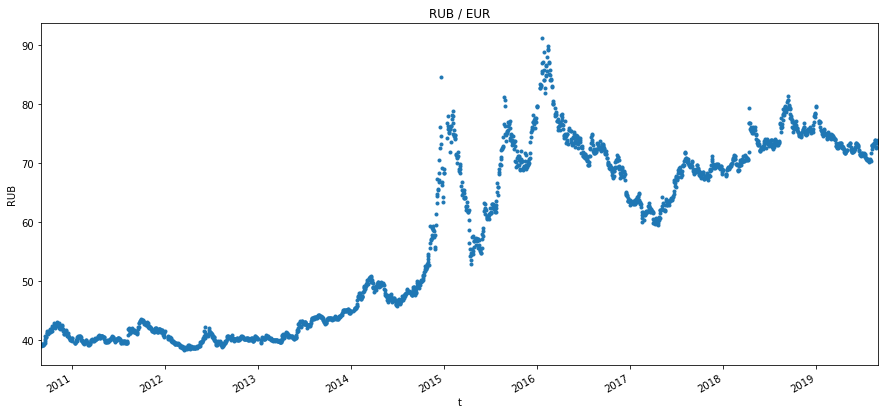

In [11]:
_ = eur_df['EUR'].plot(style='.', figsize=(15, 7), title='RUB / EUR')
plt.ylabel('RUB')
plt.xlabel('t')

In [12]:
eur_df['EUR_diff'] = eur_df['EUR'].diff().fillna(0)
eur_df.head()

,EUR,EUR_diff
data,,
2010-09-01,39.0127,0.0000
2010-09-02,39.1654,0.1527
2010-09-03,39.2901,0.1247
2010-09-04,39.3505,0.0604
2010-09-07,39.4720,0.1215


Text(0.5, 0, 't')

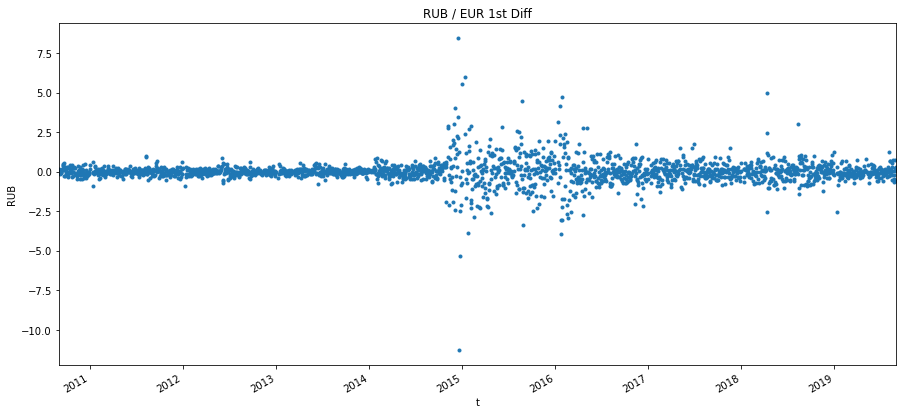

In [13]:
_ = eur_df.iloc[1:, -1].plot(style='.', figsize=(15, 7), title='RUB / EUR 1st Diff')
plt.ylabel('RUB')
plt.xlabel('t')

In [14]:
brent_data = brent_data.merge(usd_df, left_index=True, right_index=True)
brent_data = brent_data.merge(eur_df, left_index=True, right_index=True)
brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,brent_diff,USD,USD_diff,EUR,EUR_diff
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0,0.00,30.8669,0.0000,39.0127,0.0000
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0,0.52,30.8001,-0.0668,39.1654,0.1527
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0,-0.32,30.6858,-0.1143,39.2901,0.1247
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0,0.05,30.6922,0.0064,39.3505,0.0604
2010-09-07,77.26,2010,9,7,3,250,36,1,0,0,1,0.39,30.5771,-0.1151,39.4720,0.1215


#### 3. Cделайте ее перрасчет (ресемплинг) в представление по неделям.

In [159]:
brent_data_w = brent_data.resample('W').mean().fillna(0)
brent_data_w.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday,brent_diff,USD,USD_diff,EUR,EUR_diff
2010-09-05,76.6125,2010.0,9.00,2.5,3.00,245.5,35.0,3.5,0.0,0.0,0.0,0.0625,30.76125,-0.043675,39.204675,0.084450
2010-09-12,77.8340,2010.0,9.00,9.0,3.00,252.0,36.0,3.0,0.0,0.0,0.2,0.2980,30.79402,0.040300,39.293360,-0.031760
2010-09-19,78.6850,2010.0,9.00,15.5,3.00,258.5,37.0,2.5,0.0,0.0,0.0,-0.3050,30.78775,0.032150,39.769300,0.281225
2010-09-26,78.2025,2010.0,9.00,22.5,3.00,265.5,38.0,2.5,0.0,0.0,0.0,-0.1400,31.01200,-0.019875,40.988325,0.181625
2010-10-03,81.3600,2010.0,9.25,22.0,3.25,272.5,39.0,2.5,0.0,0.0,0.0,1.4175,30.53220,-0.108850,41.274425,0.044825


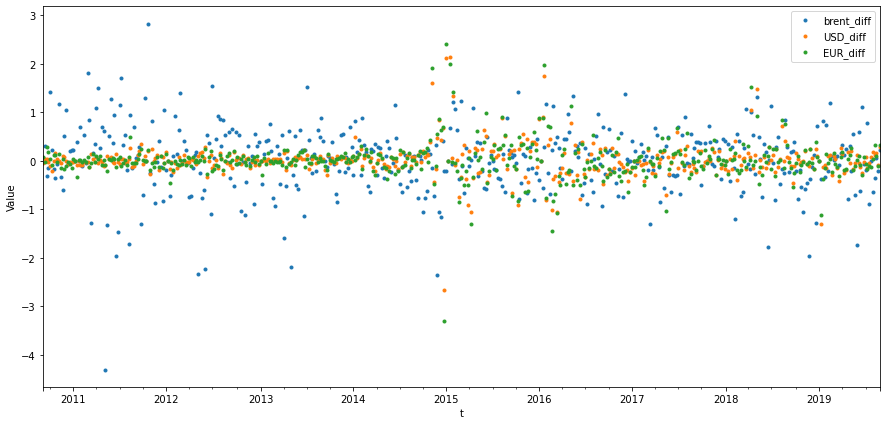

In [160]:
_ = brent_data_w['brent_diff'].plot(style='.', figsize=(15, 7))
_ = brent_data_w['USD_diff'].plot(style='.', figsize=(15, 7))
_ = brent_data_w['EUR_diff'].plot(style='.', figsize=(15, 7))
plt.ylabel('Value')
plt.xlabel('t')
plt.legend()

#### 4. Постройте модель предсказания 1-й точки от текущей (h=1)

Запишем итоговую систему признаков и проведем ее анализ. Горизонт прогнозирования h = 1, тогда target = y(t+h)=y(t+1) 

In [161]:
def exponential_smoothing(series, alpha):
    result = [series[0]] 
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [162]:
brent_data_w['brent_diff_exp_0_01'] = exponential_smoothing(brent_data_w['brent_diff'], 0.01)
brent_data_w['brent_diff_exp_0_08'] = exponential_smoothing(brent_data_w['brent_diff'], 0.08)
brent_data_w['brent_diff_exp_0_10'] = exponential_smoothing(brent_data_w['brent_diff'], 0.10)

brent_data_w['USD_diff_exp_0_01'] = exponential_smoothing(brent_data_w['USD_diff'], 0.01)
brent_data_w['USD_diff_exp_0_08'] = exponential_smoothing(brent_data_w['USD_diff'], 0.08)
brent_data_w['USD_difff_exp_0_10'] = exponential_smoothing(brent_data_w['USD_diff'], 0.10)

brent_data_w['EUR_diff_exp_0_01'] = exponential_smoothing(brent_data_w['EUR_diff'], 0.01)
brent_data_w['EUR_diff_exp_0_08'] = exponential_smoothing(brent_data_w['EUR_diff'], 0.08)
brent_data_w['EUR_diff_exp_0_10'] = exponential_smoothing(brent_data_w['EUR_diff'], 0.10)

brent_data_w.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,...,EUR_diff,brent_diff_exp_0_01,brent_diff_exp_0_08,brent_diff_exp_0_10,USD_diff_exp_0_01,USD_diff_exp_0_08,USD_difff_exp_0_10,EUR_diff_exp_0_01,EUR_diff_exp_0_08,EUR_diff_exp_0_10
2010-09-05,76.6125,2010.0,9.00,2.5,3.00,245.5,35.0,3.5,0.0,0.0,...,0.084450,0.062500,0.062500,0.062500,-0.043675,-0.043675,-0.043675,0.084450,0.084450,0.084450
2010-09-12,77.8340,2010.0,9.00,9.0,3.00,252.0,36.0,3.0,0.0,0.0,...,-0.031760,0.064855,0.081340,0.086050,-0.042835,-0.036957,-0.035278,0.083288,0.075153,0.072829
2010-09-19,78.6850,2010.0,9.00,15.5,3.00,258.5,37.0,2.5,0.0,0.0,...,0.281225,0.061156,0.050433,0.046945,-0.042085,-0.031428,-0.028535,0.085267,0.091639,0.093669
2010-09-26,78.2025,2010.0,9.00,22.5,3.00,265.5,38.0,2.5,0.0,0.0,...,0.181625,0.059145,0.035198,0.028250,-0.041863,-0.030504,-0.027669,0.086231,0.098838,0.102464
2010-10-03,81.3600,2010.0,9.25,22.0,3.25,272.5,39.0,2.5,0.0,0.0,...,0.044825,0.072728,0.145782,0.167175,-0.042533,-0.036772,-0.035787,0.085817,0.094517,0.096700


In [163]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.feature_selection import f_regression, mutual_info_regression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, DBSCAN

In [164]:
scl_target=StandardScaler() 

h=1
target = brent_data_w["Значение"].values[h:].reshape((brent_data_w.shape[0]-h,1))
y = scl_target.fit_transform(target)
y.shape

(469, 1)

In [165]:
scl_x=StandardScaler() 

X = brent_data_w.iloc[:-h,:].values
X = scl_x.fit_transform(X.astype('float64'))
X.shape

(469, 25)

In [166]:
f_test, _ = f_regression(X, y.ravel())

for i in range(X.shape[1]):
    print("F-test={:.2f},  I={}".format(f_test[i],i))

F-test=1122.89,  I=0
F-test=0.01,  I=1
F-test=5.04,  I=2
F-test=1.59,  I=3
F-test=3.77,  I=4
F-test=5.59,  I=5
F-test=4.23,  I=6
F-test=0.01,  I=7
F-test=0.57,  I=8
F-test=2.11,  I=9
F-test=2.01,  I=10
F-test=0.13,  I=11
F-test=652.00,  I=12
F-test=0.79,  I=13
F-test=449.22,  I=14
F-test=1.05,  I=15
F-test=387.56,  I=16
F-test=26.54,  I=17
F-test=20.63,  I=18
F-test=303.47,  I=19
F-test=3.73,  I=20
F-test=2.70,  I=21
F-test=1.30,  I=22
F-test=4.51,  I=23
F-test=3.79,  I=24


Проверка через F-test показывает, что есть корреляционная связь с предшествующим значением ряда (признак X[:,0]), а кроме этого интересные признаки  2, 12, 14, 16-19.Применим автоматизацию выбора через SelectKBest c выделением 5 лучших признаков.

In [167]:
sfk =SelectKBest(f_regression, k=5)
X_new1 =sfk.fit_transform(X, y.ravel())
X_new1.shape

(469, 5)

Лучшее множество признаков отделенов X_new1. Проверим результат оценки признаков по процентному отбору и сохраним его в X_new2.

In [168]:
sfp=SelectPercentile(f_regression, percentile=10)
X_new2 = sfp.fit_transform(X, y.ravel())
X_new2.shape

(469, 3)

Наконец, третий вариант - применим выделение признаков через построение модели . Помним , что модель должна уметь выбрать подмножество признаков или вернуть коэффициент их влиятельности. Это ограничивает выбор моделей. Возьмем как оценшик GradientBoostingRegressor и построим новое пространство в X_new3

In [169]:
gr_model = GradientBoostingRegressor(max_depth=5, random_state=40, n_estimators=100).fit(X, y.ravel())
sfm = SelectFromModel(gr_model,  max_features = 5)

sfm.fit(X, y.ravel())
X_new3 = sfm.transform(X)
X_new3.shape

(469, 2)

In [170]:
[X_new1[:5,:], X_new2[:5,:],X_new3[:5,:]]

[array([[-0.09497087, -0.96591494, -1.03233493,  0.611385  , -1.82977836],
        [-0.05224334, -0.9639885 , -1.02702909,  0.67616521, -1.799526  ],
        [-0.02247574, -0.96435709, -0.99855463,  0.57442728, -1.77251223],
        [-0.03935338, -0.95117413, -0.92562301,  0.51909413, -1.76451084],
        [ 0.07109456, -0.97938008, -0.90850627,  0.89274391, -1.78864309]]),
 array([[-0.09497087, -0.96591494, -1.03233493],
        [-0.05224334, -0.9639885 , -1.02702909],
        [-0.02247574, -0.96435709, -0.99855463],
        [-0.03935338, -0.95117413, -0.92562301],
        [ 0.07109456, -0.97938008, -0.90850627]]),
 array([[-0.09497087,  0.5862878 ],
        [-0.05224334,  0.64770776],
        [-0.02247574,  0.70912772],
        [-0.03935338,  0.77527229],
        [ 0.07109456,  0.84141686]])]

In [171]:
list_param_k =np.where(sfk.get_support())[0]
list_param_p =np.where(sfp.get_support())[0]
list_param_m =np.where(sfm.get_support())[0]

print('Номера признаков k лучших признаков : ',list_param_k)
print('Номера признаков лучших признаков по процентной форме: ',list_param_p)
print('Номера признаков для выбора по модели : ',list_param_m)

Номера признаков k лучших признаков :  [ 0 12 14 16 19]
Номера признаков лучших признаков по процентной форме:  [ 0 12 14]
Номера признаков для выбора по модели :  [0 5]


Пересечение выбора по отбору для модели и по количественным оценкам связи в признаке 0. Имеет смысл брать объединение выборов. Возьмем [0, 1, 5, 12, 14] признаки и перейдем к построению модели.

In [172]:
X_new = X[:,[0,5,12,14,16,19]]

In [173]:
def split_data(data, split_date):
    return data.iloc[:split_date,:].copy(), \
           data.iloc[split_date:,:].copy()

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [197]:
train, test = split_data(brent_data_w, -50)

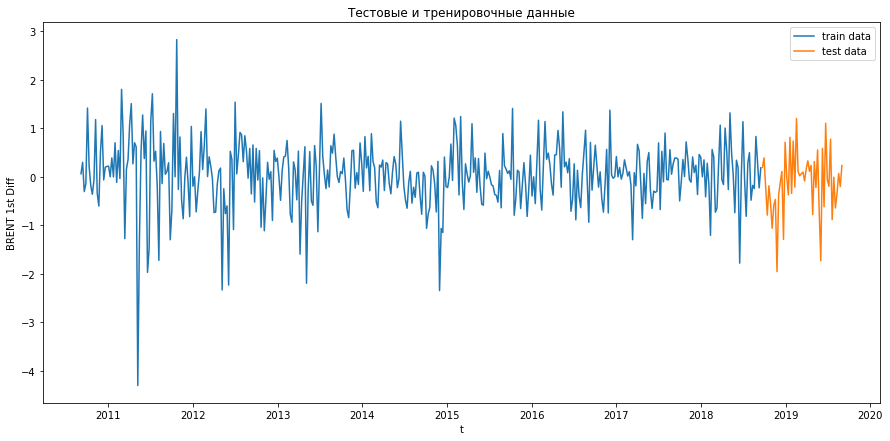

In [198]:
h = 1

X_train = train.iloc[:-h, :]
y_train = train['brent_diff'].values[h:]
X_test = test.iloc[:-h, :]
y_test = test['brent_diff'].values[h:]

plt.figure(figsize=(15, 7))
plt.xlabel('t')
plt.ylabel('BRENT 1st Diff')
plt.plot(train.index.get_level_values(0), train['brent_diff'], label='train data' )
plt.plot(test.index.get_level_values(0), test['brent_diff'], label='test data')
plt.title('Тестовые и тренировочные данные')
plt.legend()
plt.show()

In [199]:
X_train =X_new[:train.shape[0],:]
y_train =y[:train.shape[0],0]
X_test =X_new[train.shape[0]:,:]
y_test =y[train.shape[0]:,0]

In [200]:
train.shape

(420, 25)

In [201]:
model_g = GradientBoostingRegressor(max_depth=5, random_state=10, n_estimators=1000)
model_l = LinearRegression()

In [202]:
model_l.fit( X_train, y_train ) # 
model_g.fit( X_train, y_train ) 

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=10, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

**Посмотрим тесты**

In [203]:
X_test.shape

(49, 6)

In [204]:
y_pred_g = model_g.predict(X_train)
y_pred_l= model_l.predict(X_train)

y_test_pred_g = model_g.predict(X_test)
y_test_pred_l= model_l.predict(X_test)

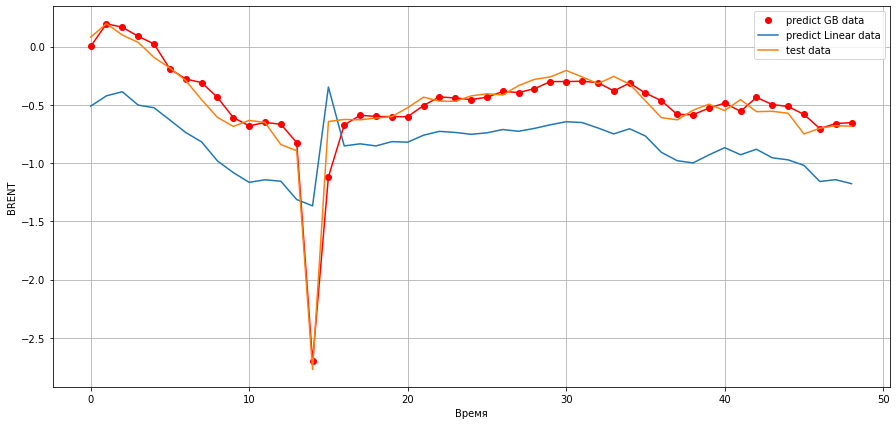

In [205]:
plt.figure( figsize=( 15, 7 ))


plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_test_pred_g[:100],'or', label='predict GB data' )
plt.plot(y_test_pred_g[:100],'r' )
plt.plot(y_test_pred_l[:100], label='predict Linear data' )
plt.plot(y_test[:100], label='test data')
plt.grid()
plt.legend()
plt.show()

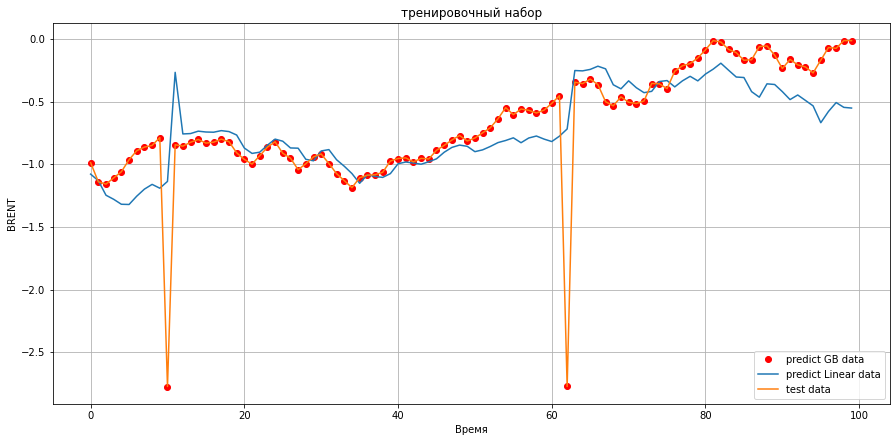

In [206]:
plt.figure( figsize=( 15, 7 ))

plt.title('тренировочный набор')
plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_pred_g[-100:],'or', label='predict GB data' )
plt.plot(y_pred_l[-100:], label='predict Linear data' )
plt.plot(y_train[-100:], label='test data')
plt.grid()
plt.legend()
plt.show()

Линейная модель практически не работает, т.к. видно запаздывание в размере h. Градиентный бустинг практически не отличается от нее на интервале обучения. Посмотрим на оценки.

**Оценки для сравнения моделей**

In [207]:
er_s = mean_squared_error(y_true=y_test, y_pred=y_test_pred_g) 
er_a = mean_absolute_error(y_true=y_test, y_pred=y_test_pred_g) 
er_r2 = r2_score(y_true=y_test, y_pred=y_test_pred_g)

print('ошибка mse :  ', er_s,'\nошибка mae  :  ', er_a,'\nоценка R2 :  ', er_r2)

ошибка mse :   0.010340705932640457 
ошибка mae  :   0.06908030907446254 
оценка R2 :   0.9368481546135314


In [208]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [214]:
er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform( y_test),y_pred = scl_target.inverse_transform( y_test_pred_g))

print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   inf %


In [217]:
from sklearn.model_selection import RandomizedSearchCV

def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

param_dist = {"max_depth": [3, 2,1,4,5], 
              "n_estimators":[100,200,300,400,500,600,700,800,900,1000]}

#  randomized search
n_iter_search = 10

model_gr =GradientBoostingRegressor()

random_search = RandomizedSearchCV(model_gr, param_distributions=param_dist, n_iter=n_iter_search, cv=5, iid=False)

random_search.fit(X_train, y_train)

report(random_search.cv_results_)

Model with rank: 1
Mean validation score: 0.373 (std: 0.218)
Parameters: {'n_estimators': 700, 'max_depth': 4}

Model with rank: 2
Mean validation score: 0.372 (std: 0.256)
Parameters: {'n_estimators': 300, 'max_depth': 4}

Model with rank: 3
Mean validation score: 0.364 (std: 0.249)
Parameters: {'n_estimators': 400, 'max_depth': 4}



In [218]:
model_g_best = GradientBoostingRegressor(max_depth=4,  n_estimators=700)
model_g_best.fit( X_train, y_train ) 
y_test_pred_g = model_g_best.predict(X_test)

er_g = mean_absolute_percentage_error(y_true=scl_target.inverse_transform(y_test),y_pred = scl_target.inverse_transform(y_test_pred_g))
print('ошибка градиентного бустинга MAPE :  ', er_g,'%')

ошибка градиентного бустинга MAPE :   inf %


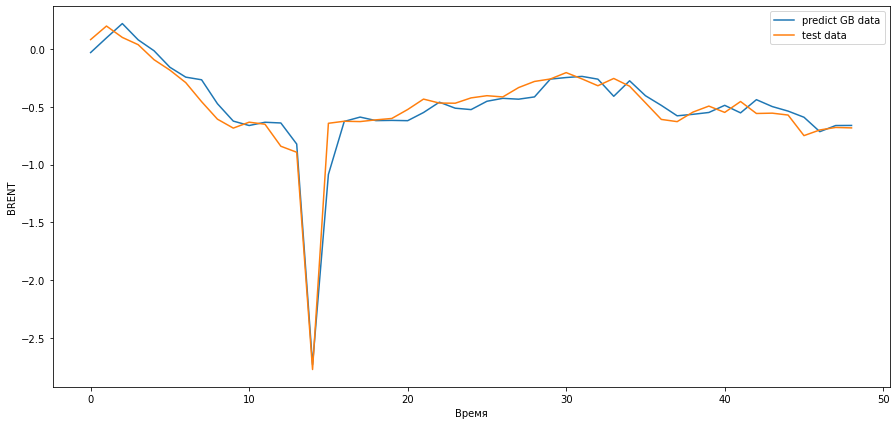

In [219]:
plt.figure( figsize=( 15, 7 ))

plt.xlabel('Время')
plt.ylabel('BRENT')
plt.plot(y_test_pred_g, label='predict GB data' )
plt.plot(y_test, label='test data')

plt.legend()
plt.show()

#### Сохраниение модели

In [220]:
import pickle
# save the model to disk
filename = 'final_model_brent.sav'
pickle.dump(model_g_best, open(filename, 'wb'))

filename = 'final_scaler_brent_y.sav'
pickle.dump(scl_target, open(filename, 'wb'))

filename = 'final_scaler_brent_x.sav'
pickle.dump(scl_x, open(filename, 'wb'))

### 5. Сделайте вывод о поведении ошибки предсказания ряда в сравнении с прямым прогнозированием.

В моем случае ошибка ушла в инфинитив и сделать какие-либо выводы я не могу. Однако, если судить по графику, то модель хорошо справилась с предсказаниями в представлении по неделям.  